In [1]:
import pandas as pd
import numpy as np

import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
train = pd.read_csv('../data/assignment_2_train.csv')
test = pd.read_csv('../data/assignment_2_test.csv')

Wall time: 11.4 s


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 541.1+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 300.6+ MB


In [5]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
%%time
train.describe()

Wall time: 2.84 s


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.000000,179997.000000,179047.000000,160567.000000,160567.000000,...,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000
mean,3.077000e+06,0.028561,1.909818e+06,129.514237,9860.225806,368.326897,153.410374,200.363089,291.160444,86.559903,...,0.137074,74.962242,99.220468,85.778161,8.326725,18.404676,12.437524,26.798593,32.005349,28.492421
std,5.196167e+04,0.166570,1.039029e+06,206.515032,4910.778205,158.952840,11.529483,40.585532,102.250385,3.958070,...,0.642444,545.161980,668.223140,577.072150,84.616132,120.896921,99.305885,252.695682,284.870583,258.372941
min,2.987000e+06,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.032000e+06,0.000000,1.091681e+06,44.000000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.077000e+06,0.000000,1.884075e+06,75.000000,9633.000000,375.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.121999e+06,0.000000,2.693196e+06,125.000000,14182.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.166999e+06,1.000000,3.958317e+06,5278.950000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,15.000000,20750.000000,32250.000000,21250.000000,3100.000000,3350.000000,3250.000000,8250.000000,8250.000000,8250.000000


# Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

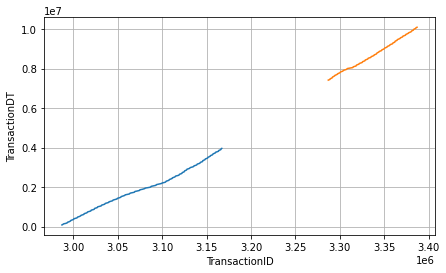

In [7]:
plt.figure(figsize=(7, 4))
plt.plot(train['TransactionID'], train['TransactionDT'])
plt.plot(test['TransactionID'], test['TransactionDT'])
plt.xlabel('TransactionID')
plt.ylabel('TransactionDT')
plt.grid()

## Вывод:
- Видно что, тестовые данные были даны спустя какое то время после последней транзакции тестовой выборки
- ввиду отсутствия достаточного опыта, сказу что здесь, скорее всего, подойдет кросвасидация - как один из самых надежных методов валидации модели

# Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

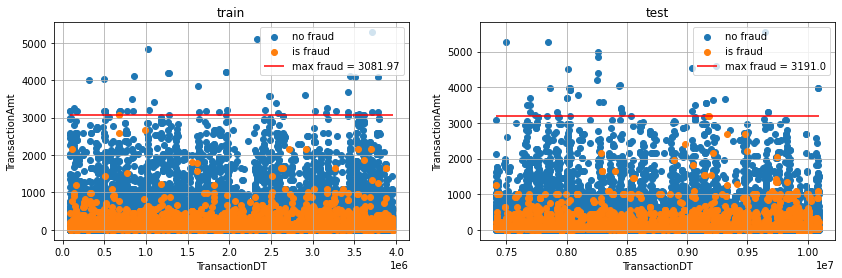

In [8]:
def split_classes(df):
    return df[df['isFraud'] == 0], df[df['isFraud'] == 1]

train_0, train_1 = split_classes(train)
test_0, test_1 = split_classes(test)

def scattering_classes(idx, class_0, class_1, title):
    max_fraud = class_1['TransactionAmt'].max()
    
    ax[idx].set_title(title)
    
    ax[idx].scatter(class_0['TransactionDT'], class_0['TransactionAmt'], label='no fraud')
    ax[idx].scatter(class_1['TransactionDT'], class_1['TransactionAmt'], label='is fraud')
    
    ax[idx].hlines(max_fraud, class_1['TransactionDT'].min(), class_1['TransactionDT'].max(), 
                   color='r', label=f'max fraud = {max_fraud}')
    
    ax[idx].set_xlabel('TransactionDT')
    ax[idx].set_ylabel('TransactionAmt')
    
    ax[idx].legend(loc='best')
    ax[idx].grid()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

scattering_classes(0, train_0, train_1, 'train')
scattering_classes(1, test_0, test_1, 'test')

## Вывод:
- мошенничества происходили в течении всего времени
- максимальная сумма мошенничества не превышала 3200 у.е., и в целом имеют значения меньше чем не мошеннические транзакции

# Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей и для тестовой выборки, сделать выводы.

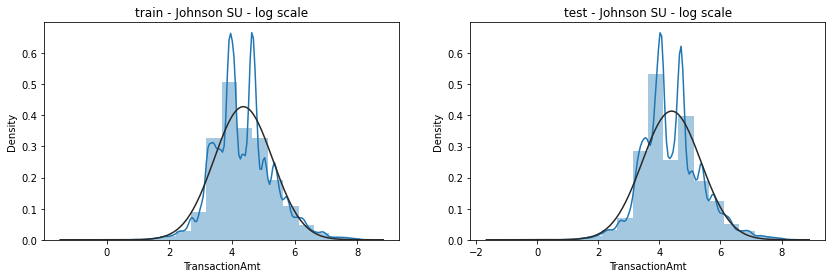

In [9]:
def dist_plot(df, idx, title, stat):
    ax[idx].set_title(title + ' - log scale')
    sns.distplot(np.log(df['TransactionAmt']), bins=20, fit=stat, ax=ax[idx])

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
dist_plot(train, 0, 'train - Johnson SU', st.norm)
dist_plot(test, 1, 'test - Johnson SU', st.norm)

## Вывод:
- TransactionAmt не распределяется нормально

# Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

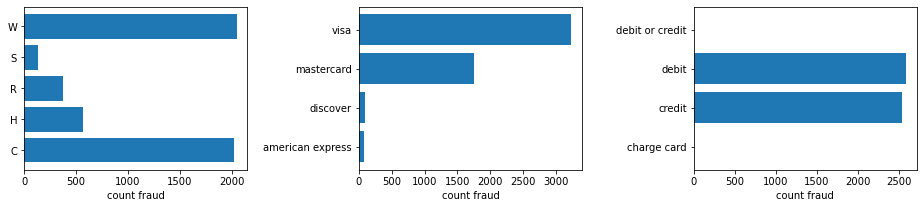

In [10]:
def bars_target(idx, stat):
    
    ax[idx].barh(stat.index, stat.values)
    ax[idx].set_xlabel('count fraud')
    
fig, ax = plt.subplots(1, 3, figsize=(16, 3))

bars_target(0, train.groupby(['ProductCD'])['isFraud'].sum())
bars_target(1, train.groupby(['card4'])['isFraud'].sum())
bars_target(2, train.groupby(['card6'])['isFraud'].sum())

plt.subplots_adjust(wspace=0.5)

### value counts

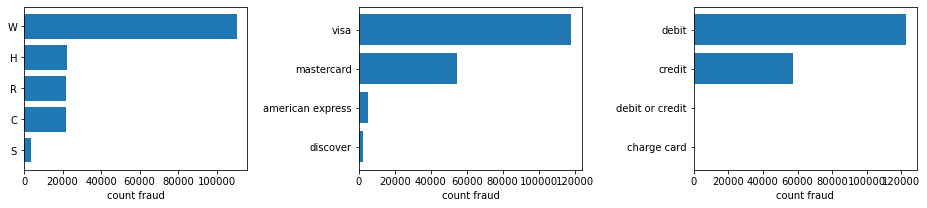

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3))

bars_target(0, train['ProductCD'].value_counts()[::-1])
bars_target(1, train['card4'].value_counts()[::-1])
bars_target(2, train['card6'].value_counts()[::-1])

plt.subplots_adjust(wspace=0.5)

## Вывод:
Наибольшее число мошеничеств происходит в: 
- категориях W (самая многочисленная), и С в признаке ProductCD
- visa и mastercard - вероятно потому что они самые распространенные
- дебетах и кредитах - так же вероятно из-за того что они имеют больше всего данных